
## LPA - Prática - Aula 27 - 5.3 Resolução do exercício
---

## Parte 1 - Importação das bibliotecas

In [1]:
# Biblioteca Pandas - Manipulação de dados
import pandas as pd
# Biblioteca Seaborn - Criação de gráficos
import seaborn as sns
# Biblioteca Matplotlib - Criação de gráficos
import matplotlib.pyplot as plt

# OPCIONAL - Biblioteca para ignorar mensagens de warning (aviso) ao rodar uma célula de código
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Bibliotecas de machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

# Métricas de avaliação dos modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

---
## Parte 2 - Importação das dos dados

In [3]:
# Função read_csv para importar os dados da pasta do computador
dados = pd.read_csv('database/precos_carros_brasil.csv')

In [4]:
# Listando o nome das colunas
dados.columns

Index(['year_of_reference', 'month_of_reference', 'fipe_code',
       'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl'],
      dtype='object')

In [5]:
# Imprimindo as 5 primeiras linhas
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [6]:
# Observando número de linhas e colunas
dados.shape

(267542, 11)

Resumo dos dados: 1385 linhas e 10 colunas (variáveis)

---
## Parte 3: Análise Exploratória dos Dados (AED)

#### Ter uma primeira visão sobre os dados e extrair os primeiros insights

In [7]:
# Imprime o tipo de dado em cada coluna: object - variáveis categóricas; float64 e int64 - variáveis numéricas
dados.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

In [8]:
# Transformando variaveis de ano em Inteiro
dados['year_of_reference'] = dados['year_of_reference'].astype('Int64')
dados['year_model'] = dados['year_model'].astype('Int64')

In [9]:
def atribui_numericos_mes(mes):
    if(mes == 'January'):
        return 1
    if(mes == 'February'):
        return 2
    if(mes == 'March'):
        return 3
    if(mes == 'April'):
        return 4
    if(mes == 'May'):
        return 5
    if(mes == 'June'):
        return 6
    if(mes == 'July'):
        return 7
    if(mes == 'August'):
        return 8
    if(mes == 'September'):
        return 9
    if(mes == 'October'):
        return 10
    if(mes == 'November'):
        return 11
    if(mes == 'December'):
        return 12
    
dados['month_of_reference'] = dados['month_of_reference'].apply(atribui_numericos_mes)
dados['month_of_reference'] = dados['month_of_reference'].astype('Int64')

In [10]:
# Verificando a alteração
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,1,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002,9162.0
1,2021,1,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001,8832.0
2,2021,1,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000,8388.0
3,2021,1,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000,8453.0
4,2021,1,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001,12525.0


In [11]:
# Criando categorias para separar colunas numéricas e categóricas: facilita a AED
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

In [12]:
# Resumo das variáveis numéricas - Imprime alguns valores de medidas de tendências centrais 
dados[numericas_cols].describe()

,year_of_reference,month_of_reference,year_model,avg_price_brl
count,202297.0,202297.0,202297.0,202297.000000
mean,2021.564694,6.295837,2011.271527,52756.909153
std,0.571903,3.552733,6.376234,51628.677716
min,2021.0,1.0,2000.0,6647.000000
25%,2021.0,3.0,2006.0,22855.000000
50%,2022.0,6.0,2012.0,38027.000000
75%,2022.0,9.0,2016.0,64064.000000
max,2023.0,12.0,2023.0,979358.000000


In [13]:
# Resumo das variáveis categóricas - Imprime alguns valores de estatística descritiva
dados[categoricas_cols].describe()

,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202297,202297,202297,202297,202297,202297,202297
unique,2091,202295,6,2112,3,2,29
top,003281-6,3r6c277cnqcb,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,425,2,44962,425,168685,161885,47420


In [14]:
# Verificando se existem valores faltantes nos dados 
dados.isna().any()

year_of_reference     True
month_of_reference    True
fipe_code             True
authentication        True
brand                 True
model                 True
fuel                  True
gear                  True
engine_size           True
year_model            True
avg_price_brl         True
dtype: bool

In [15]:
# Verificando a quantidade de valores faltantes por coluna
dados.isna().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

In [16]:
#Remover linhas com dados faltantes
#Dataset apresenta dados faltantes em todas as colunas
dados.dropna(inplace=True)

In [115]:
# Substituir os valores faltantes por "Nada consta". Argumento inplace = true significa que a modificação será aplicada  
# Na mesma variável - chamada dados - sem precisar criar outra variável (dados_2, dados_V2, etc)
#dados['Area Formacao'].fillna('Nada Consta', inplace=True)

In [116]:
# Como fazer para substituir pela média
# dados['Faixa Salarial – numero'].fillna(dados['Faixa Salarial – numero'].mean(), inplace=True)

In [117]:
# Ou então, podemos excluir a coluna com valor faltante, se não for relevante para a análise
# dados.drop('Faixa Salarial – numero', axis=1, inplace=True)

## axis = 1 - sentido da coluna; axis = 2 - sentido das linhas

In [17]:
# Depois das correções, verificando se ainda há valores faltantes
dados.isna().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64

In [18]:
# Verificando se temos valores duplicados
dados.duplicated().sum() 

2

In [19]:
# Removendo valores duplicados
dados.drop_duplicates(inplace=True)

In [20]:
# nº de linhas e colunas após mudanças. Caso houvesse dados duplicados, o número de linhas seria reduzido
dados.shape

(202295, 11)

In [21]:
# Contagem de valores por categoria de 'Model'
dados['model'].value_counts()

model
Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Saveiro Robust 1.6 Total Flex 16V CD        2
Saveiro Robust 1.6 Total Flex 16V           2
Gol Last Edition 1.0 Flex 12V 5p            2
Polo Track 1.0 Flex 12V 5p                  2
Name: count, Length: 2112, dtype: int64

In [22]:
# Contagem de valores por categoria de 'Faixa Salarial'
dados['brand'].value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64

In [23]:
# Resultado após inserção de nova coluna
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,1,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002,9162.0
1,2021,1,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001,8832.0
2,2021,1,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000,8388.0
3,2021,1,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000,8453.0
4,2021,1,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001,12525.0


# A partir daqui falta alterar para o trabalho final

---
## Parte 4: Visualização dos resultados

#### O que queremos responder com esses dados?

### 1. Distribuição do nº de funcionários por sexo, nível de senioridade e nível de formação

Podemos fazer um gráfico com a distribuição de homens e mulheres

In [24]:
# Contagem do nº de homens e mulheres na empresa
quantidadeMarca = dados['brand'].value_counts()

Text(0, 0.5, 'Total de carros')

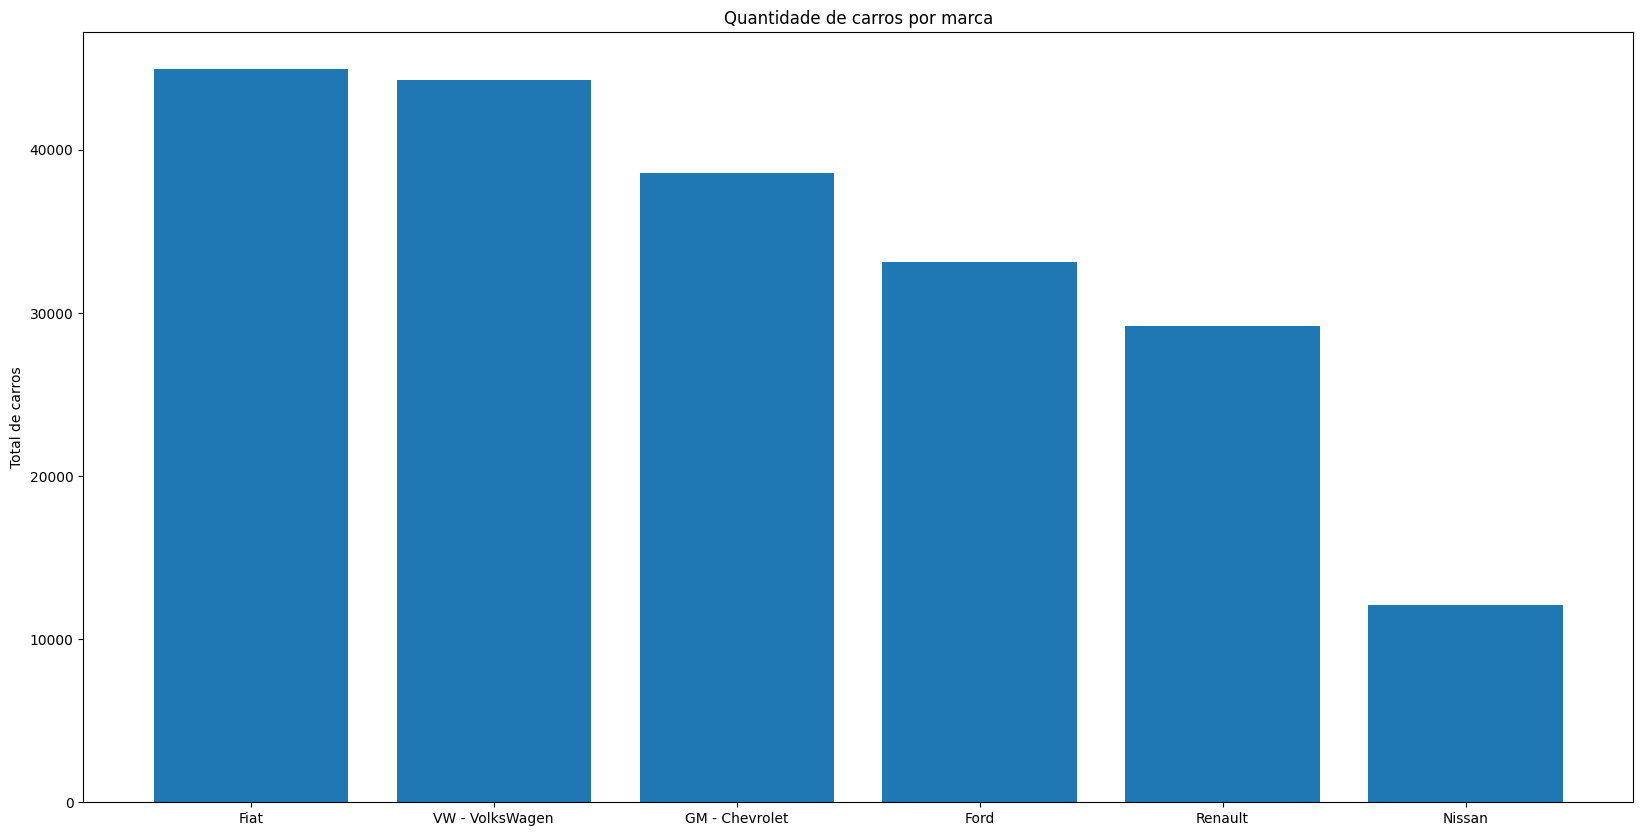

In [25]:
# Gráfico da distribuição por gênero - plt é a biblioteca Matplotlib
plt.figure(figsize=(20,10))
plt.bar(quantidadeMarca.index, quantidadeMarca.values) # plt.bar para gráfico de barras. Variáveis nos eixos X e Y
plt.title('Quantidade de carros por marca') # plt.title para inserir título no gráfico
plt.ylabel('Total de carros') # # plt.ylabel para inserir título no gráfico

Vamos gerar esse gráfico de um jeito mais bonito

Link de palletes do seaborn: [Palettes](https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=palette)

Text(0, 0.5, 'Total de carros')

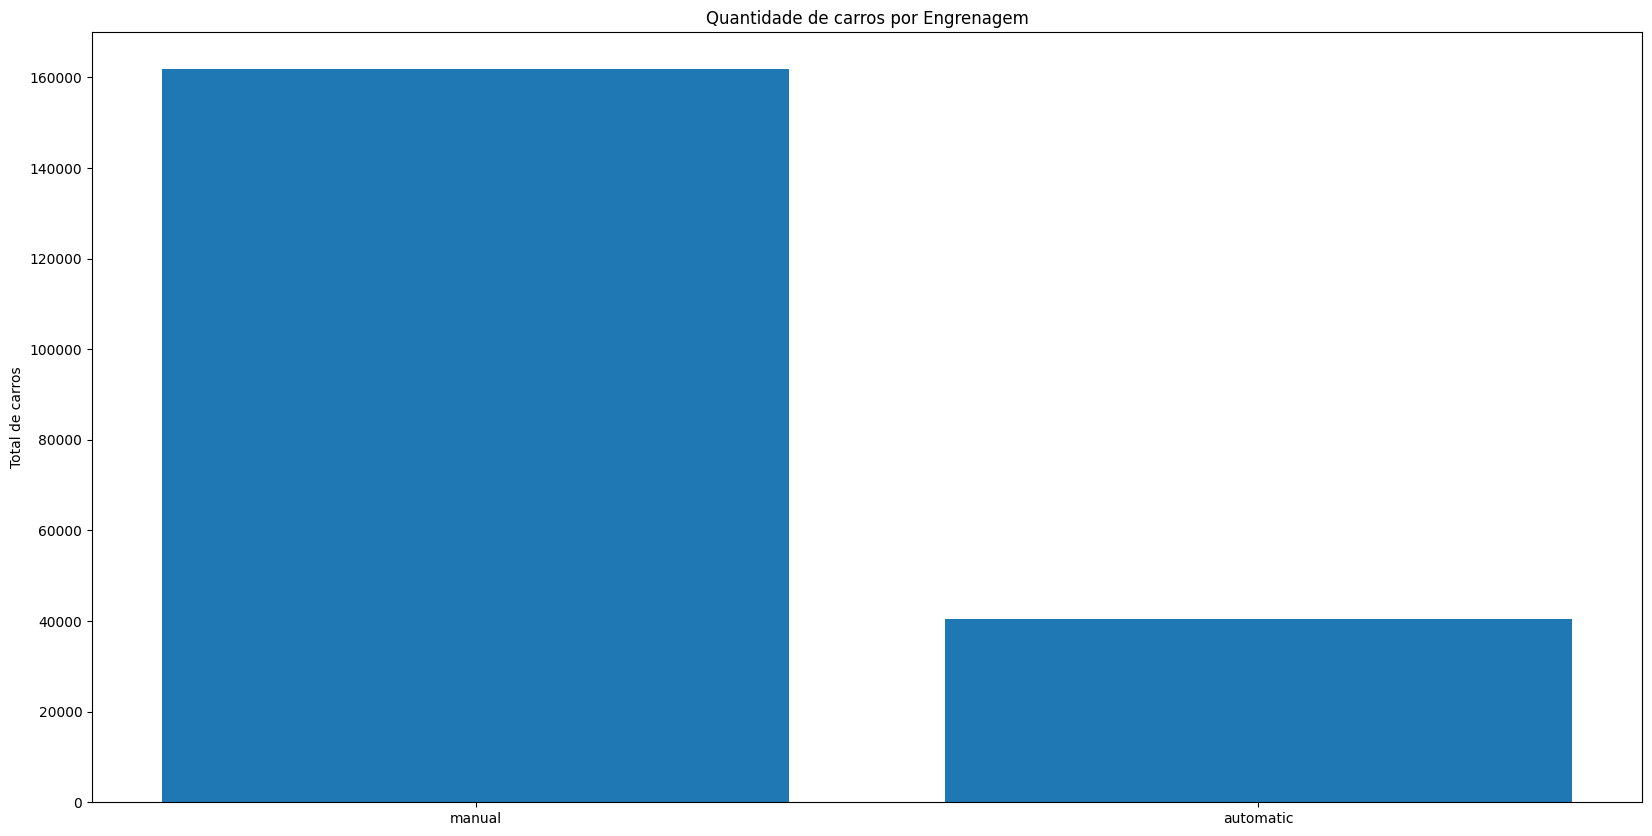

In [26]:
quantidadeCarroEngrenagem = dados['gear'].value_counts()

# Gráfico da distribuição por gênero - plt é a biblioteca Matplotlib
plt.figure(figsize=(20,10))
plt.bar(quantidadeCarroEngrenagem.index, quantidadeCarroEngrenagem.values) # plt.bar para gráfico de barras. Variáveis nos eixos X e Y
plt.title('Quantidade de carros por Engrenagem') # plt.title para inserir título no gráfico
plt.ylabel('Total de carros') # # plt.ylabel para inserir título no gráfico

# A PARTIR DAQUI NÄO FUNCIONA

In [27]:
dados2022 = dados.loc(dados['year_of_reference'] == 2022)

# Visualizando a média salarial por ano
plt.figure(figsize=(20,10)) # Aumentar tamanho da imagem que será impressa na tela
sns.barplot(x='month_of_reference', y='avg_price_brl', hue='year_of_reference', data=dados2022, hue_order=['2022'])
plt.xticks(rotation=45);

TypeError: unhashable type: 'Series'

Agora por nível de senioridade

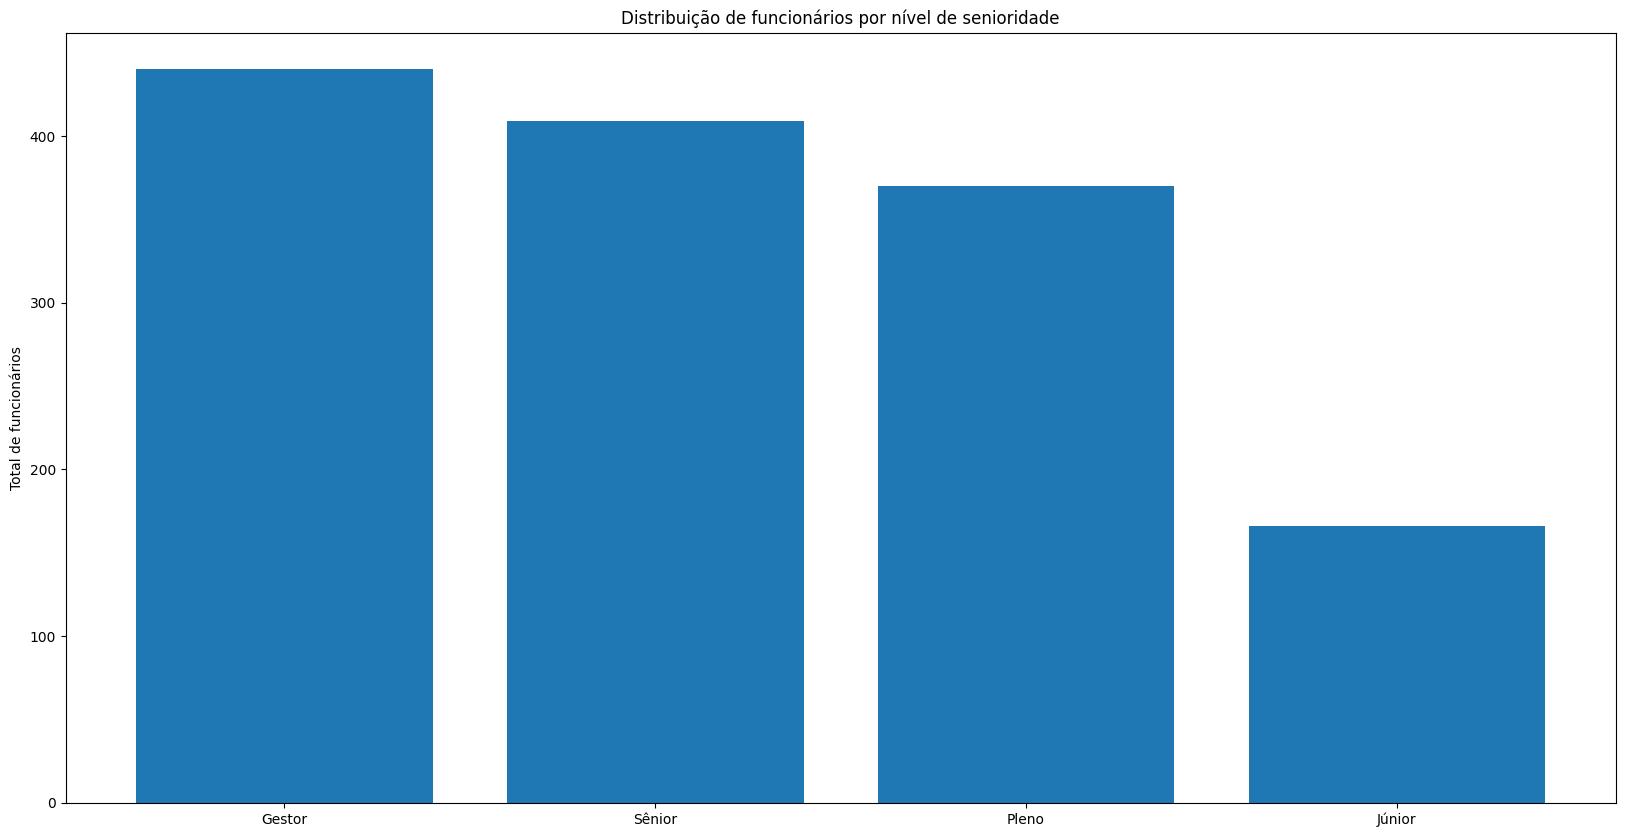

In [130]:
plt.figure(figsize=(20,10))
plt.bar(dados['Nivel'].unique(), dados['Nivel'].value_counts())
plt.title('Distribuição de funcionários por nível de senioridade')
plt.ylabel('Total de funcionários');

---
### 2. Evolução da média salarial ao longo do tempo, com base na data de último aumento

In [131]:
# Criando uma coluna somente com o ano de aumento
dados['Data ultimo aumento - Ano']=dados['Data ultimo aumento'].dt.year

In [132]:
# Transformando a coluna ano em categoria
dados['Data ultimo aumento - Ano'] = dados['Data ultimo aumento - Ano'].astype(str)
dados.dtypes

Idade                                 int64
Genero                               object
Nivel Ensino                         object
Area Formacao                        object
Setor                                object
Nivel                                object
Faixa Salarial                       object
Anos experiencia                     object
Faixa Salarial – numero               int64
Data ultimo aumento          datetime64[ns]
Média Salarial                      float64
Data ultimo aumento - Ano            object
dtype: object

In [133]:
# Calculando a média por ano (coluna Data ultimo aumento - Ano) para saber se os salários aumentaram ou diminuíram entre 2021 e 2023
media_salarial_ano = dados.groupby(['Data ultimo aumento - Ano', 'Genero'])['Faixa Salarial – numero'].mean().round(0) # round para arrendodar
media_salarial_ano.head()

Data ultimo aumento - Ano  Genero   
2021                       Feminino      9695.0
                           Masculino     9495.0
2022                       Feminino      9331.0
                           Masculino    11271.0
2023                       Feminino      9440.0
Name: Faixa Salarial – numero, dtype: float64

In [134]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_salarial_ano = media_salarial_ano.reset_index(name='Salario Medio')
media_salarial_ano.head()

,Data ultimo aumento - Ano,Genero,Salario Medio
0,2021,Feminino,9695.0
1,2021,Masculino,9495.0
2,2022,Feminino,9331.0
3,2022,Masculino,11271.0
4,2023,Feminino,9440.0


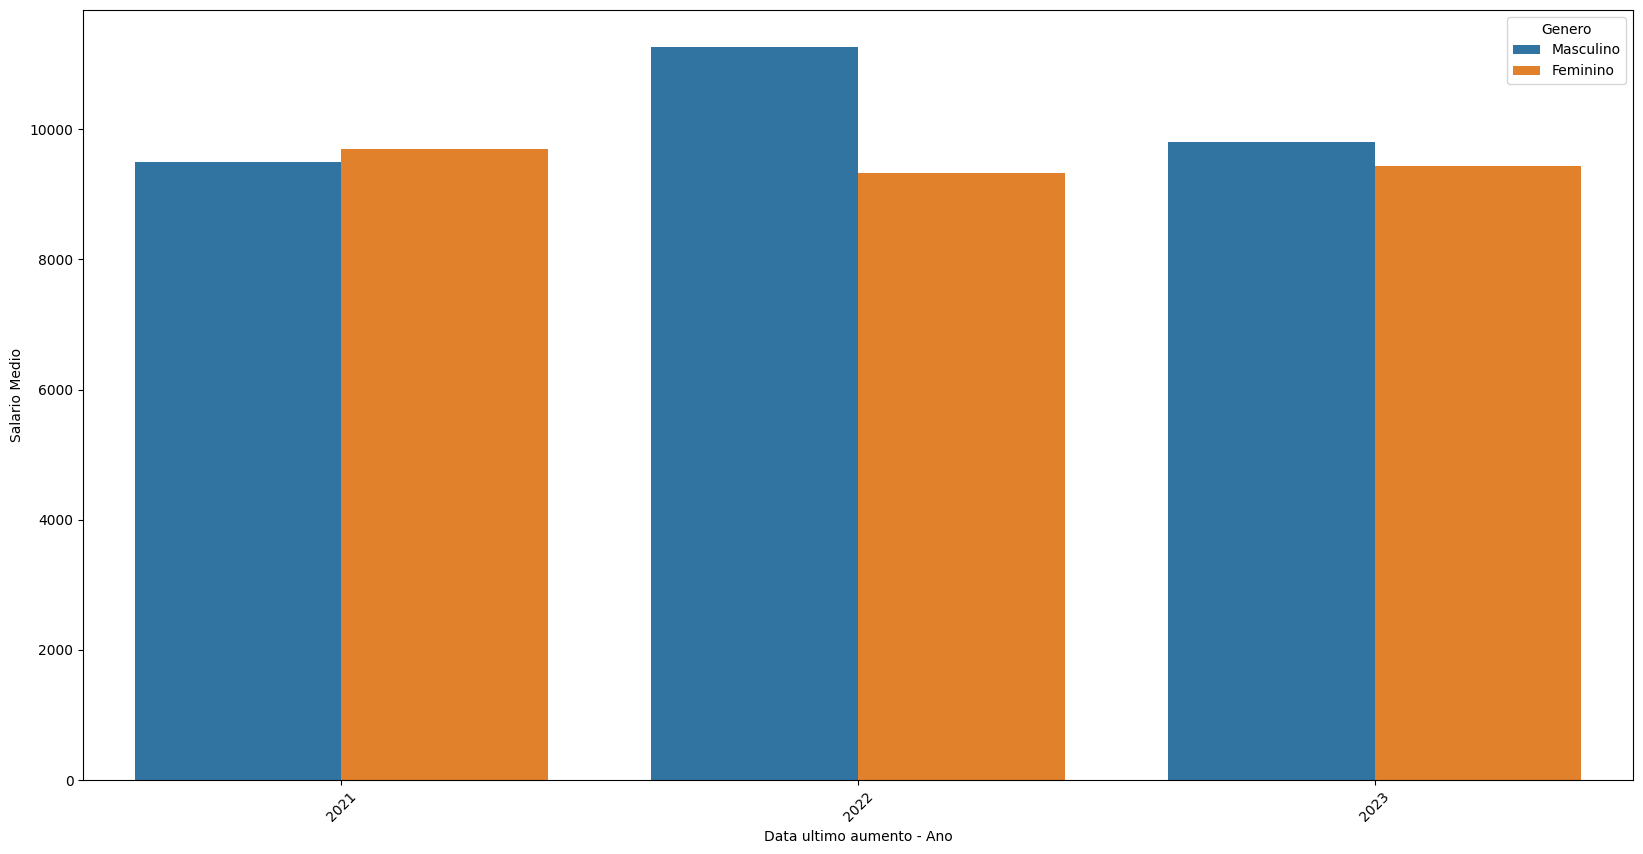

In [135]:
# Visualizando a média salarial por ano
plt.figure(figsize=(20,10)) # Aumentar tamanho da imagem que será impressa na tela
sns.barplot(x='Data ultimo aumento - Ano', y='Salario Medio', hue='Genero', data=media_salarial_ano, hue_order=['Masculino', 'Feminino'])
plt.xticks(rotation=45);

#### Houve um aumento médio no salário dos funcionários entre 2021 e 2022. Entre 2022 e 2023, houve uma queda

---
### 3. Distribuição salarial por nível de senioridade e gênero

In [136]:
# Agrupamento por gênero e nível do cargo - Júnior, Pleno, Sênior e Gestão
agrupamento_nivel_cargo = dados.groupby('Genero')['Nivel'].value_counts()
agrupamento_nivel_cargo.head()

Genero     Nivel 
Feminino   Júnior    134
           Pleno     123
           Sênior     88
           Gestor     61
Masculino  Pleno     317
Name: count, dtype: int64

In [137]:
# Cálculo da média por nível do cargo e gênero
media_nivel_cargo = dados.groupby(['Genero', 'Nivel'])['Faixa Salarial – numero'].mean()
media_nivel_cargo.head()

Genero     Nivel 
Feminino   Gestor    16491.803279
           Júnior     4985.074627
           Pleno      8910.569106
           Sênior    12386.363636
Masculino  Gestor    16514.285714
Name: Faixa Salarial – numero, dtype: float64

In [138]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_nivel_cargo = media_nivel_cargo.reset_index(name='Salario Medio')
media_nivel_cargo.head()

,Genero,Nivel,Salario Medio
0,Feminino,Gestor,16491.803279
1,Feminino,Júnior,4985.074627
2,Feminino,Pleno,8910.569106
3,Feminino,Sênior,12386.363636
4,Masculino,Gestor,16514.285714


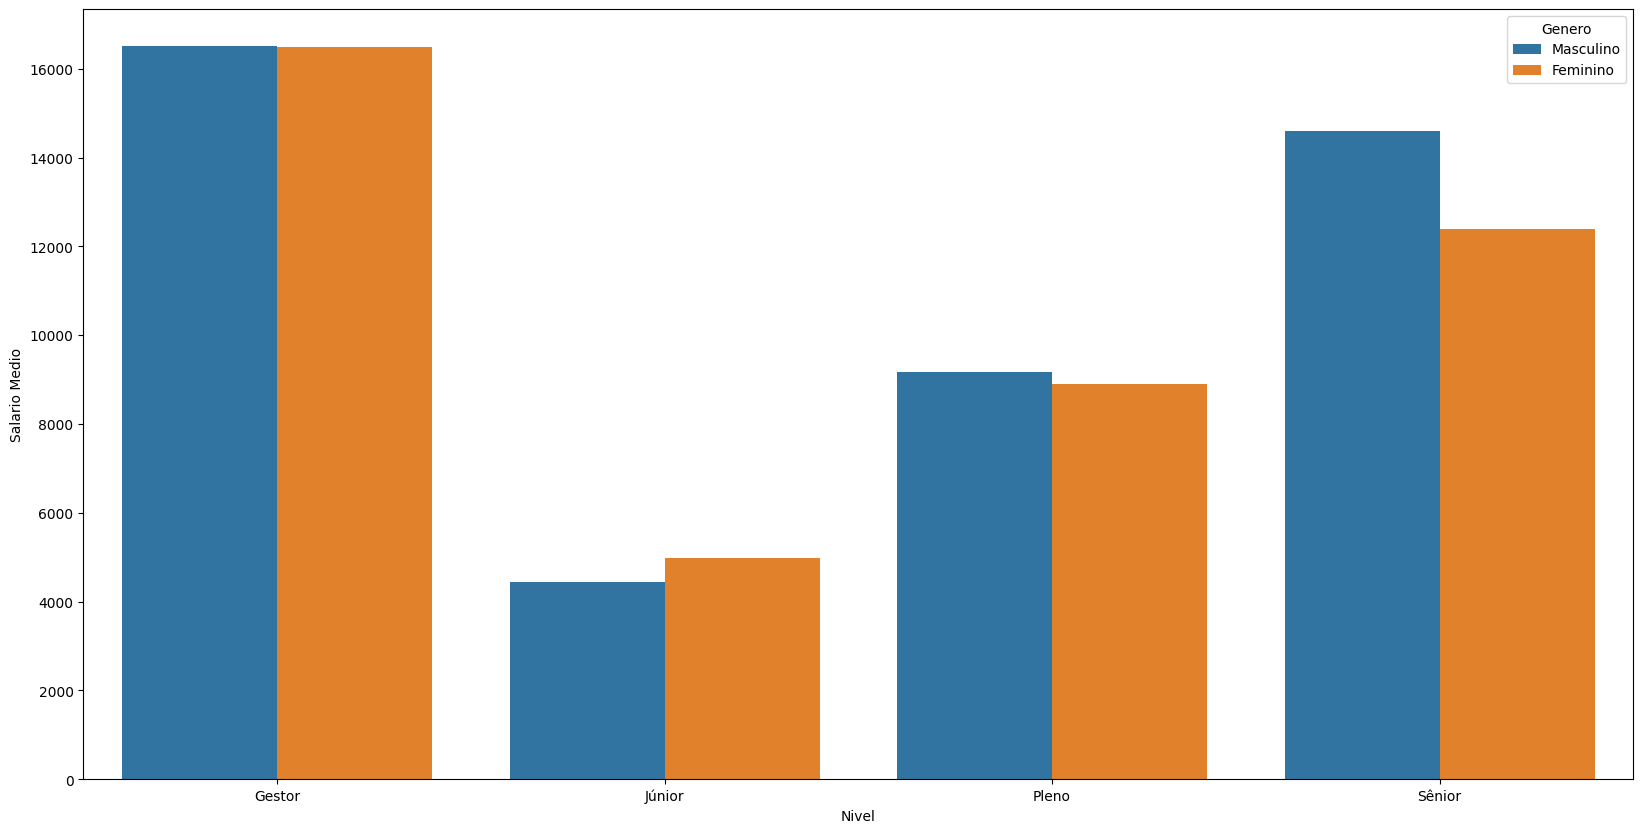

In [139]:
# Visualizando a média salarial por nível do cargo
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel', y='Salario Medio', hue='Genero', data=media_nivel_cargo, hue_order=['Masculino', 'Feminino']);

---
### 4. Distribuição salarial por anos de experiência e gênero

### Vamos analisar os salários

Primeiro vamos fazer um histograma para analisar a distribuição geral dos salários

<Axes: >

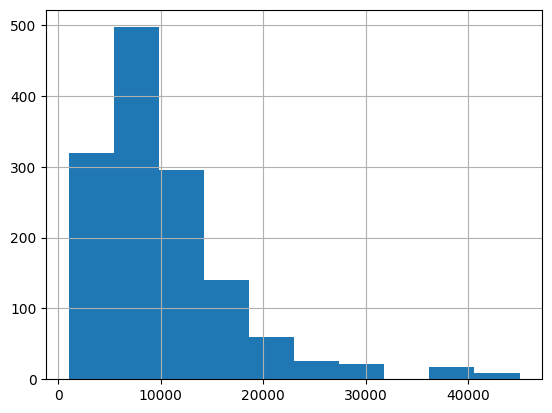

In [140]:
dados['Faixa Salarial – numero'].hist()

In [141]:
# Agrupamento por gênero e anos de experiência
agrupamento_anos_experiencia = dados.groupby('Genero')['Anos experiencia'].value_counts()
agrupamento_anos_experiencia.head()

Genero    Anos experiencia
Feminino  Menos de 1 ano      90
          de 1 a 2 anos       87
          de 2 a 3 anos       82
          de 4 a 5 anos       70
          de 6 a 10 anos      41
Name: count, dtype: int64

In [142]:
# Cálculo da média por anos de experiência e gênero
media_anos_experiencia = dados.groupby(['Genero', 'Anos experiencia'])['Faixa Salarial – numero'].mean()
media_anos_experiencia.head()

Genero    Anos experiencia
Feminino  Mais de 10 anos     15083.333333
          Menos de 1 ano       5388.888889
          de 1 a 2 anos        7540.229885
          de 2 a 3 anos        9512.195122
          de 4 a 5 anos       11685.714286
Name: Faixa Salarial – numero, dtype: float64

In [143]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_anos_experiencia = media_anos_experiencia.reset_index(name='Salario Medio')
media_anos_experiencia.head()

,Genero,Anos experiencia,Salario Medio
0,Feminino,Mais de 10 anos,15083.333333
1,Feminino,Menos de 1 ano,5388.888889
2,Feminino,de 1 a 2 anos,7540.229885
3,Feminino,de 2 a 3 anos,9512.195122
4,Feminino,de 4 a 5 anos,11685.714286


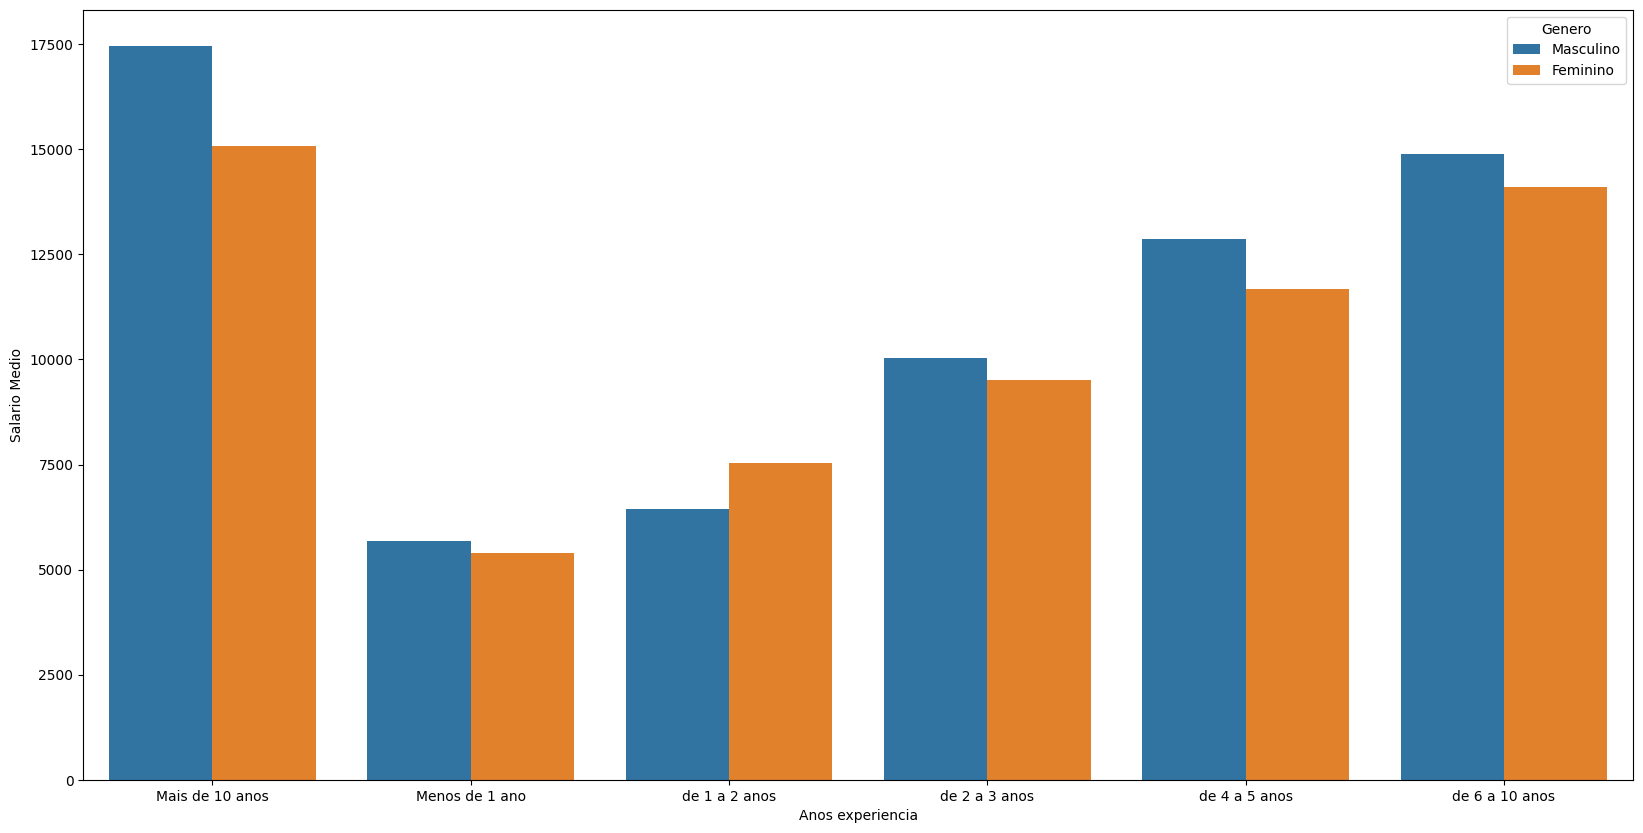

In [144]:
# Visualizando a média salarial por nível do cargo
plt.figure(figsize=(20,10))
sns.barplot(x='Anos experiencia', y='Salario Medio', hue='Genero', data=media_anos_experiencia, hue_order=['Masculino', 'Feminino']);

---
## Parte 5: Organização dos dados para modelagem de machine learning

#### Objetivo: predizer o valor do salário dos funcionários


### 1. Análise da variável resposta (também chamada de target)

Como tínhamos visto anteriomente, os casos de valores faltantes foram resolvidos: substituição por "Nada consta"

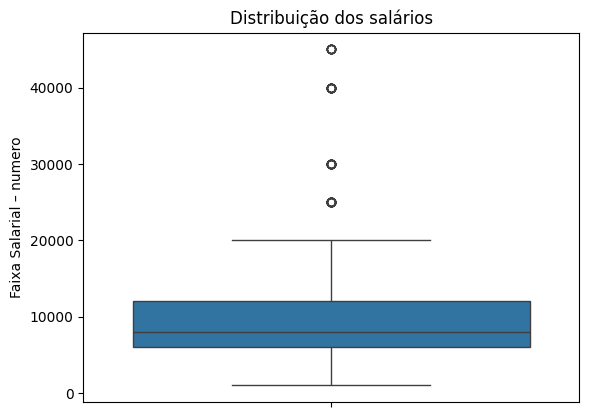

In [145]:
sns.boxplot(dados['Faixa Salarial – numero']).set_title("Distribuição dos salários");

##### Com esse boxplot de distribuição dos salários, podemos notar que temos casos de salários altos, acima de 25 mil reais. São chamados valores outliers.

### 2. Divisão dos dados

Para a divisão de dados, optou-se por:

* Conjunto de Treinamento (X_train, y_train): Conjunto utilizado para treinar o modelo. Neste caso, 70% dos dados são selecionados para treinamento, conforme definido pela variável train_ratio.

* Conjunto de Teste (X_test, y_test): Conjunto utilizado para avaliar o desempenho do modelo em dados não vistos durante o treinamento. Neste caso, 30% dos dados são reservados para teste


Algoritmos de machine learning de Regressão não aceitam variáveis categóricas e, por isso, precisamos utilizar técnicas para converter as classes em números

In [146]:
# Coluna Gênero tem dois valores: Feminino e Masculino. Após aplicar a função abaixo, ficará com valores 0 e 1 (1 Masculino e 0 Feminino)
dados['Genero'] = LabelEncoder().fit_transform(dados['Genero']) 
dados.head()

,Idade,Genero,Nivel Ensino,Area Formacao,Setor,Nivel,Faixa Salarial,Anos experiencia,Faixa Salarial – numero,Data ultimo aumento,Média Salarial,Data ultimo aumento - Ano
0,38,1,Pós-graduação,Química / Física,Marketing,Gestor,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,6000,2021-02-01,9993.0,2021
1,39,1,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Consultoria,Gestor,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,8000,2021-06-04,9993.0,2021
2,30,1,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Indústria,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-04-15,9993.0,2023
3,38,0,Pós-graduação,Outras,Serviços,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,16000,2021-04-06,9993.0,2021
4,36,1,Pós-graduação,Outras Engenharias,Varejo,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-03-22,9993.0,2023


Agora, transformando a coluna anos de experiência em numérica

In [147]:
# Função para atribuir valores numéricos com base nos anos de experiência
def atribuir_valor_numerico(categoria):
    if categoria == 'Menos de 1 ano':
        return 1
    elif categoria == 'de 1 a 2 anos':
        return 1.5
    elif categoria == 'de 2 a 3 anos':
        return 3.5
    elif categoria == 'de 4 a 5 anos':
        return 4.5
    elif categoria == 'de 6 a 10 anos':
        return 8
    elif categoria == 'Mais de 10 anos':
        return 15
    else:
        return None  # Caso queira lidar com categorias não mapeadas

# Criar a nova coluna usando a função aplicada na coluna 'Anos experiencia'
dados['Anos experiencia - numerico'] = dados['Anos experiencia'].apply(atribuir_valor_numerico)

In [148]:
# Nome das colunas
dados.columns

Index(['Idade', 'Genero', 'Nivel Ensino', 'Area Formacao', 'Setor', 'Nivel',
       'Faixa Salarial', 'Anos experiencia', 'Faixa Salarial – numero',
       'Data ultimo aumento', 'Média Salarial', 'Data ultimo aumento - Ano',
       'Anos experiencia - numerico'],
      dtype='object')

In [149]:
# Variável dados_num contém apenas variáveis numéricas de interesse (exclui o restante)
dados_num = dados.drop(['Nivel Ensino', 'Area Formacao', 'Setor', 'Nivel',
       'Faixa Salarial', 'Anos experiencia',
       'Data ultimo aumento', 'Média Salarial', 'Data ultimo aumento - Ano'],axis = 1)
dados_num.head()

,Idade,Genero,Faixa Salarial – numero,Anos experiencia - numerico
0,38,1,6000,15.0
1,39,1,8000,3.5
2,30,1,12000,1.5
3,38,0,16000,15.0
4,36,1,12000,1.5


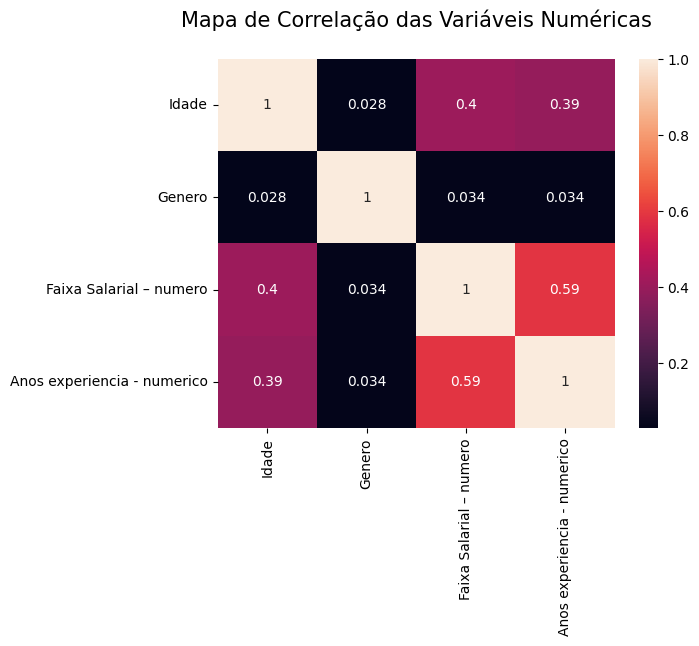

In [150]:
# Mapa de correlação das variáveis numéricas com variável Target
sns.heatmap(dados_num.corr("spearman"), annot = True)
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

In [151]:
# Variável X contém apenas variáveis numéricas de interesse para a análise, excluindo a variável target 
X = dados_num.drop(['Faixa Salarial – numero'],axis = 1)
X.head()

,Idade,Genero,Anos experiencia - numerico
0,38,1,15.0
1,39,1,3.5
2,30,1,1.5
3,38,0,15.0
4,36,1,1.5


In [152]:
# Variável Y contém apenas a variável target - Faixa Salarial
Y = dados_num['Faixa Salarial – numero']
Y.head()

0     6000
1     8000
2    12000
3    16000
4    12000
Name: Faixa Salarial – numero, dtype: int64

In [153]:
# Divisão: 30% dos dados são de teste e 70% de treinamento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [154]:
# Observando os dados de treinamento
print(X_train.shape)
X_train.head(1)

(969, 3)


,Idade,Genero,Anos experiencia - numerico
772,31,1,8.0


In [155]:
# Observando os dados de teste
print(X_test.shape)
X_test.head(1)

(416, 3)


,Idade,Genero,Anos experiencia - numerico
1128,25,1,1.5


In [156]:
# Observando a variável target
Y_test.head()

1128     4000
237      3000
163     12000
739     12000
51      12000
Name: Faixa Salarial – numero, dtype: int64

### 3. Treinamento do modelo

#### Aqui vamos treinar 2 modelos, sendo a variável target o salário e as variáveis de entrada Idade, Gênero e Anos de Experiência 
- Random Forest - combina a saída de múltiplas árvores de decisão para chegar a um único resultado
- XGBoost - significa “eXtreme Gradient Boosting”. Essa técnica é baseada no conceito de boosting, que consiste em combinar vários modelos fracos para criar um modelo forte

#### 3.1 Random Forest

In [157]:
# Algoritmo Random Forest, sem especificar nenhum parâmetro (número de árvores, número de ramificações, etc)
model_rf = RandomForestRegressor()

In [158]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [159]:
# Predição dos valores de salário com base nos dados de teste
valores_preditos_rf = model_rf.predict(X_test)

In [160]:
# Valores preditos
valores_preditos_rf

array([ 5743.93217927, 13086.58960417, 20277.96176046,  8692.        ,
       12661.66666667,  5942.55952381,  3815.91941392, 12020.52380952,
       13086.58960417, 11387.64357864, 10414.35842915,  6280.26587302,
        5942.55952381,  6280.26587302, 14621.47835498,  8383.70104895,
        9552.66666667,  9426.47619048,  4256.14486902, 14103.37871764,
        9878.83671884, 11387.64357864,  2434.27380952, 12020.52380952,
        4690.23461171,  5210.6498779 ,  9103.85470085, 23271.76190476,
       20195.93650794,  9426.47619048, 10414.35842915, 14270.        ,
        4479.88888889, 14403.61904762,  7544.31601732, 16941.8625176 ,
        8931.71428571,  8895.18928294,  4077.23376623, 16853.35714286,
       15776.64285714,  6403.66666667,  2037.4047064 , 12728.33333333,
       14103.37871764,  9737.92626818, 10414.35842915, 13960.27491952,
        8942.54864253,  7005.78266178, 10087.56179931, 11269.13492063,
       18019.66666667,  3965.08333333, 15213.28968254, 11330.60939061,
      

Analisando a importância das variáveis para estimar a variável target

In [161]:
model_rf.feature_importances_
feature_importances = pd.DataFrame(model_rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
Anos experiencia - numerico,0.487259
Idade,0.412475
Genero,0.100266


#### Métricas de acurácia do modelo

Quão acurado é o modelo para estabelecer as predições de salários com base na idade e gênero?

Existem diversas métricas para avaliar o erro da predição do nosso modelo. Hoje iremos ver as seguintes:
- MSE (Mean Squared Error)
- MAE (Mean Absolute Error)
- R²

[Aqui](https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4) tem um artigo falando sobre outras métricas de avaliação.

MSE - calcula o erro quadrático médio das predições do nosso modelo. Quanto maior o MSE, pior é o modelo.

In [162]:
mse = mean_squared_error(Y_test, valores_preditos_rf)
mse

39629234.58395554

O MAE calcula a média da diferença absoluta entre o valor predito e o valor real. Nesse caso, os erros são penalizados linearmente, ou seja, todos terão o mesmo peso na média.

In [163]:
mae = mean_absolute_error(Y_test, valores_preditos_rf)
mae

4305.841964478367

O R² é uma métrica que varia entre 0 e 1 e é uma razão que indica o quão bom o nosso modelo. Quanto maior seu valor, melhor é o modelo 

In [164]:
r2_score(Y_test, valores_preditos_rf)

0.17355959966882362

### Agora, testando o mesmo modelo, mas utilizando parâmetros do algoritmo Random Forest

In [165]:
model_rf_parametros = RandomForestRegressor(max_depth=29, min_samples_leaf=32, min_samples_split=28,
                       n_estimators=208, random_state=43)

In [166]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_rf_parametros.fit(X_train, Y_train)

RandomForestRegressor(max_depth=29, min_samples_leaf=32, min_samples_split=28,
                      n_estimators=208, random_state=43)

In [167]:
# Predição dos valores de salário com base nos dados de teste
valores_preditos_rf_parametros = model_rf_parametros.predict(X_test)

#### Analisando a importância das variáveis para estimar a variável target. Observe o aumento da importância da variável 'Anos experiencia - numerico'

In [168]:
model_rf_parametros.feature_importances_
feature_importances = pd.DataFrame(model_rf_parametros.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
Anos experiencia - numerico,0.837231
Idade,0.155928
Genero,0.006841


#### Métricas de avaliação do modelo

In [169]:
mse = mean_squared_error(Y_test, valores_preditos_rf_parametros)
mae = mean_absolute_error(Y_test, valores_preditos_rf_parametros)
r2_score(Y_test, valores_preditos_rf_parametros)

0.27209838017209864

#### Aumento na acurácia do modelo de 17% para 27%, inserindo parâmetros no algoritmo Random Forest

---
#### 3.2 XGBoost

In [170]:
model_xgboost = XGBRegressor()

In [171]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [172]:
# Predição dos valores de salário com base nos dados de teste
valores_preditos_xgboost = model_xgboost.predict(X_test)
valores_preditos_xgboost

array([ 5645.6226, 13068.446 , 20263.82  ,  8188.7925, 12262.426 ,
        6172.8945,  3766.3657, 12245.694 , 13068.446 , 11694.955 ,
       10533.964 ,  6551.2363,  6172.8945,  6551.2363, 14439.076 ,
        8352.578 ,  3572.5652,  9140.09  ,  4233.152 , 14042.099 ,
        9876.125 , 11694.955 ,  2244.4626, 12245.694 ,  4724.6436,
        5202.0527,  9288.821 , 15640.317 , 17288.87  ,  9140.09  ,
       10533.964 , 12002.522 ,  5391.0054, 13949.034 ,  7059.036 ,
       16678.75  ,  8881.32  ,  8720.666 ,  4055.7822, 17677.932 ,
       15867.892 ,  6004.2563,  1817.5685, 10006.239 , 14042.099 ,
        9330.148 , 10533.964 , 14083.922 ,  8942.644 ,  6897.338 ,
       10044.34  ,  6153.2266, 19770.596 ,  3973.9666, 15045.674 ,
       18513.246 , 11985.932 , 17133.785 ,  7820.617 ,  6337.9023,
       12740.406 , 15903.76  ,  8046.67  , 14529.529 ,  3585.4788,
       18370.352 , 12118.972 ,  4161.6553,  4547.606 ,  6183.4653,
        4290.2485, 16885.312 , 12677.458 ,  7820.617 ,  5645.6

#### Analisando a importância das variáveis para estimar a variável target. Observe o aumento da importância das variáveis 'Idade' e 'Genero'

In [173]:
model_xgboost.feature_importances_
feature_importances = pd.DataFrame(model_xgboost.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
Anos experiencia - numerico,0.613865
Idade,0.202229
Genero,0.183905


#### Métricas de avaliação do modelo

In [174]:
mse = mean_squared_error(Y_test, valores_preditos_xgboost)
mae = mean_absolute_error(Y_test, valores_preditos_xgboost)
r2_score(Y_test, valores_preditos_xgboost)

0.05641534848785856

### **Concluindo**

#### Apesar do algoritmo XGboost ter aumentando a importância de variáveis 'fracas', não foi um modelo acurado para estimar o salário dos funcionários: Acurácia de 6%

#### Nesse exemplo, o modelo Random Forest, com especificação de parâmetros como número de árvores e ramificações, foi o mais acurado: Acurácia de 27%

---
#### Fim do código
#### Obrigada!  
#### Profa. Luani R O Piva - https://www.linkedin.com/in/luanipiva/